<a href="https://colab.research.google.com/github/boemer00/deep_learning/blob/main/TF2_0_diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Load & Explore Data

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [66]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
column_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'dpf', 'age', 'outcome']
df = pd.read_csv(url, header=None, names=column_names)

In [67]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_pressure  768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   dpf             768 non-null    float64
 7   age             768 non-null    int64  
 8   outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [90]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['outcome'])
y = df['outcome']

# Convert the DataFrame to NumPy arrays
X = X.values
y = y.values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part 2: Model

In [92]:
from keras.models import Sequential
from keras.layers import Dense

In [93]:
def initialize_model():
  # architecture
  model = Sequential()
  model.add(Dense(16, activation='relu', input_shape=(8,)))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # compile
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [94]:
model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=8,
                    verbose=0)

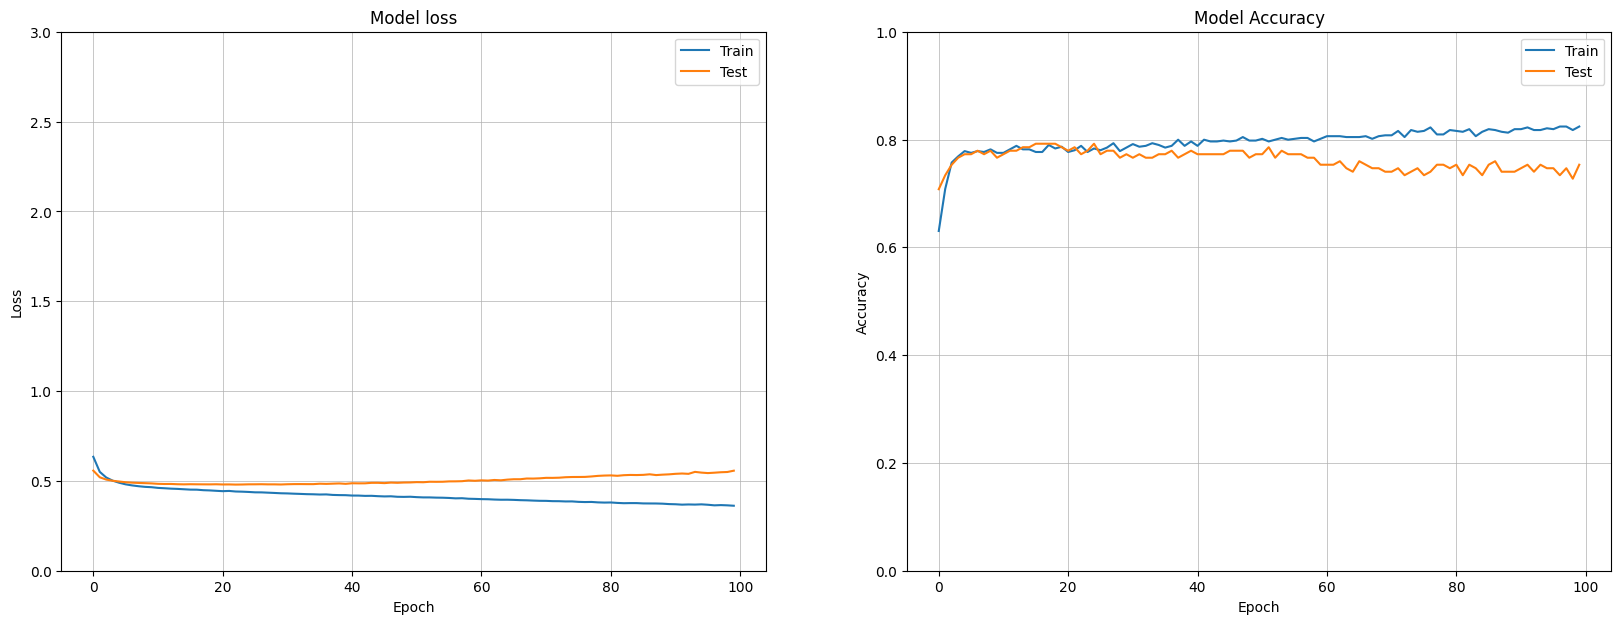

In [95]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,3))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

plot_loss_accuracy(history, title=None)

## Part 3: Making Predictions

In [96]:
pred = model.predict(X_test)
pred[:10]

5/5 [==============================] - 0s 3ms/step


array([[5.3300768e-01],
       [6.9596922e-01],
       [2.6136672e-01],
       [6.4741188e-01],
       [8.1336653e-01],
       [5.3279664e-02],
       [2.4474119e-01],
       [1.9196606e-01],
       [3.4567755e-01],
       [5.6408485e-04]], dtype=float32)

In [97]:
pred = np.round(pred).flatten()
print(pred)

[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]


In [98]:
# Calculate the accuracy, compare it to evaluate() output
print('Manually calculated accuracy: ', np.mean(pred == y_test))
print('Evaluate output: ', model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.7532467532467533
5/5 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7532
Evaluate output: [0.556805431842804, 0.7532467246055603]


## Part 4: Saving and Loading the Model

In [99]:
model.save('linearclassifier_diabetes.h5')

!ls -lh

total 40K
-rw-r--r-- 1 root root  34K Jul 25 18:26 linearclassifier_diabetes.h5
drwxr-xr-x 1 root root 4.0K Jul 20 13:28 sample_data


In [100]:
model = models.load_model('linearclassifier_diabetes.h5')
print(model.layers)
model.evaluate(X_test, y_test)

[<keras.layers.core.dense.Dense object at 0x7b09504c7820>, <keras.layers.core.dense.Dense object at 0x7b0957f4fa00>, <keras.layers.core.dense.Dense object at 0x7b09504f9990>]
5/5 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7532


[0.556805431842804, 0.7532467246055603]

In [101]:
from google.colab import files
files.download('linearclassifier_diabetes.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>